Q1

A Classification Decision Tree is a supervised machine learning model used for classification problems, where the goal is to predict a categorical outcome or class label based on a set of input features. It splits the data into subsets based on feature values at each decision point (node), eventually leading to a final classification at the leaf nodes.

1a)

Examples of real-world applications:

	1.	Medical Diagnosis: Predicting whether a patient has a particular disease based on symptoms and test results (e.g., diagnosing diabetes or cancer).
    
	2.	Email Filtering: Classifying emails as “spam” or “not spam.”
    
	3.	Customer Segmentation: Identifying whether a customer will churn (leave) or stay based on their usage behavior and demographic data.
    
	4.	Credit Scoring: Determining if a loan applicant is “creditworthy” or “not creditworthy.”
    
	5.	Fraud Detection: Detecting fraudulent transactions in banking or e-commerce.
    
1b)
    
	1.	Classification Problems:
        Goal: Predict a categorical outcome (e.g., yes/no, spam/not spam).
        Output: A discrete label or a class probability.
        Examples:
        Predicting whether an email is spam.
        Determining if a credit card transaction is fraudulent.
        Evaluation Metrics: Accuracy, precision, recall, F1 score.
	2.	Regression Problems:
        Goal: Predict a continuous numerical outcome.
        Output: A real-valued number.
        Examples:
        Predicting house prices based on features like size, location, and age.
        Forecasting stock prices.
        Evaluation Metrics: Mean squared error (MSE), R-squared.

Key Difference:
        Classification predicts a class; regression predicts a value.
    
    
    How classification decision trees make predictions:
    - Nodes represent a decision point
    - Branches represent the outcomes of a decision
    - Leaf Nodes represent the final prediction
    
    Move down questions until leaf, which is the prediction

Q2

1. Accuracy:
    
    Real-world application:

	•	General Diagnostics in balanced datasets (e.g., predicting if a person has a common cold).

Rationale:

    Accuracy is a good metric when false positives and false negatives are equally costly, and the dataset is balanced (similar numbers of positives and negatives). For example, in diagnosing a common illness, errors (misdiagnosing as sick or healthy) may have similar consequences, and the population likely has a balanced proportion of sick and healthy individuals.
    
---
    
2. Sensitivity (True Positive Rate)

Real-world application:

	Medical Screening for serious diseases (e.g., cancer detection).

Rationale:

    Sensitivity is critical when missing a positive case has severe consequences. For cancer screenings, a false negative (failing to detect cancer when it exists) could delay treatment, potentially leading to fatal outcomes. Prioritizing high sensitivity ensures most positive cases are identified, even if it means tolerating more false positives.

---

3. Specificity (True Negative Rate)

Real-world application:

    Spam Email Filtering.

Rationale:

    Specificity is important when falsely labeling negatives as positives is costly or inconvenient. For spam filtering, incorrectly classifying a legitimate email as spam (false positive) can result in users missing important emails. High specificity ensures most legitimate emails are correctly identified, even if some spam emails sneak through.
    
---
4. Precision

Real-world application:

	Fraud Detection in banking or e-commerce.

Rationale:

    Precision is crucial when false positives are costly or disruptive. In fraud detection, falsely flagging legitimate transactions as fraudulent can inconvenience customers and damage trust. High precision ensures that flagged transactions are genuinely fraudulent, minimizing disruptions for legitimate users.

In [15]:
#Q3

import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, make_scorer
import graphviz as gv

url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")
# create `ab_reduced_noNaN` based on the specs above

In [16]:
#Q3 clean data

import pandas as pd

# Load the dataset
url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

# Step 1: Remove specified columns
columns_to_drop = ['Weight_oz', 'Width', 'Height']
ab_reduced = ab.drop(columns=columns_to_drop, errors='ignore')

# Step 2: Drop rows with NaN values and explicitly create a copy
ab_reduced_noNaN = ab_reduced.dropna().copy()

# Step 3: Set data types
ab_reduced_noNaN['Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
ab_reduced_noNaN['NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)
ab_reduced_noNaN['Hard_or_Paper'] = ab_reduced_noNaN['Hard_or_Paper'].astype('category')

# Display the first few rows of the cleaned dataset
print(ab_reduced_noNaN.head())

                                               Title           Author  \
0  1,001 Facts that Will Scare the S#*t Out of Yo...      Cary McNeal   
1  21: Bringing Down the House - Movie Tie-In: Th...      Ben Mezrich   
2       100 Best-Loved Poems (Dover Thrift Editions)            Smith   
3            1421: The Year China Discovered America    Gavin Menzies   
4    1493: Uncovering the New World Columbus Created  Charles C. Mann   

   List Price  Amazon Price Hard_or_Paper  NumPages           Publisher  \
0       12.95          5.18             P       304         Adams Media   
1       15.00         10.20             P       273          Free Press   
2        1.50          1.50             P        96  Dover Publications   
3       15.99         10.87             P       672    Harper Perennial   
4       30.50         16.77             P       720               Knopf   

   Pub year     ISBN-10  Thick  
0      2010  1605506249    0.8  
1      2008  1416564195    0.7  
2      1995

In [5]:
#Q4 split data

from sklearn.model_selection import train_test_split

# Splitting the data
ab_reduced_noNaN_train, ab_reduced_noNaN_test = train_test_split(
    ab_reduced_noNaN, test_size=0.2, random_state=42
)

# Report the sizes of the datasets
print(f"Training set size: {len(ab_reduced_noNaN_train)} observations")
print(f"Testing set size: {len(ab_reduced_noNaN_test)} observations")

Training set size: 255 observations
Testing set size: 64 observations


Q4 continued, understanding question

fit(X, y) trains the DecisionTreeClassifier on the training data.
	•	X: The input feature(s) used to make predictions (e.g., “List Price”).
	•	y: The target variable (e.g., whether the book is hard cover or paperback).
	•	The method learns how to split the data at decision points (nodes) by minimizing classification errors based on the training data.

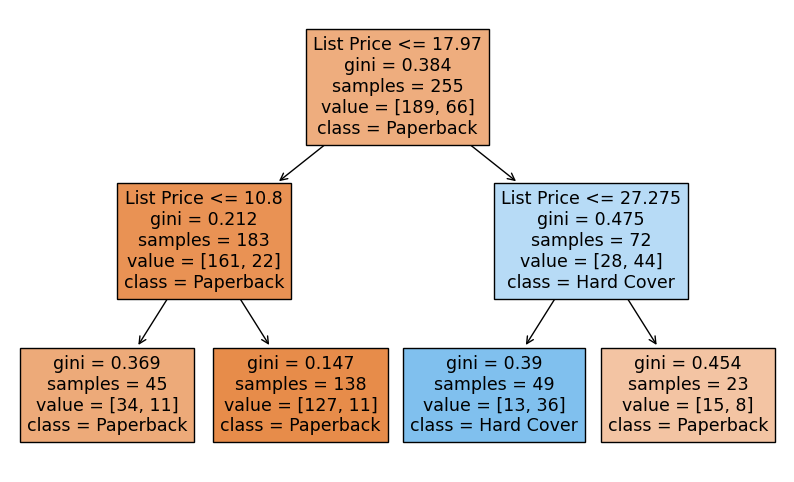

In [6]:
#Q4 training the classification tree

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Prepare the data
y = pd.get_dummies(ab_reduced_noNaN_train["Hard_or_Paper"])['H']  # Target variable: 1 = Hard Cover, 0 = Paperback
X = ab_reduced_noNaN_train[['List Price']]  # Predictor: List Price

# Train the decision tree classifier
clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X, y)

# Visualize the decision tree
plt.figure(figsize=(10, 6))
tree.plot_tree(clf, feature_names=["List Price"], class_names=["Paperback", "Hard Cover"], filled=True)
plt.show()

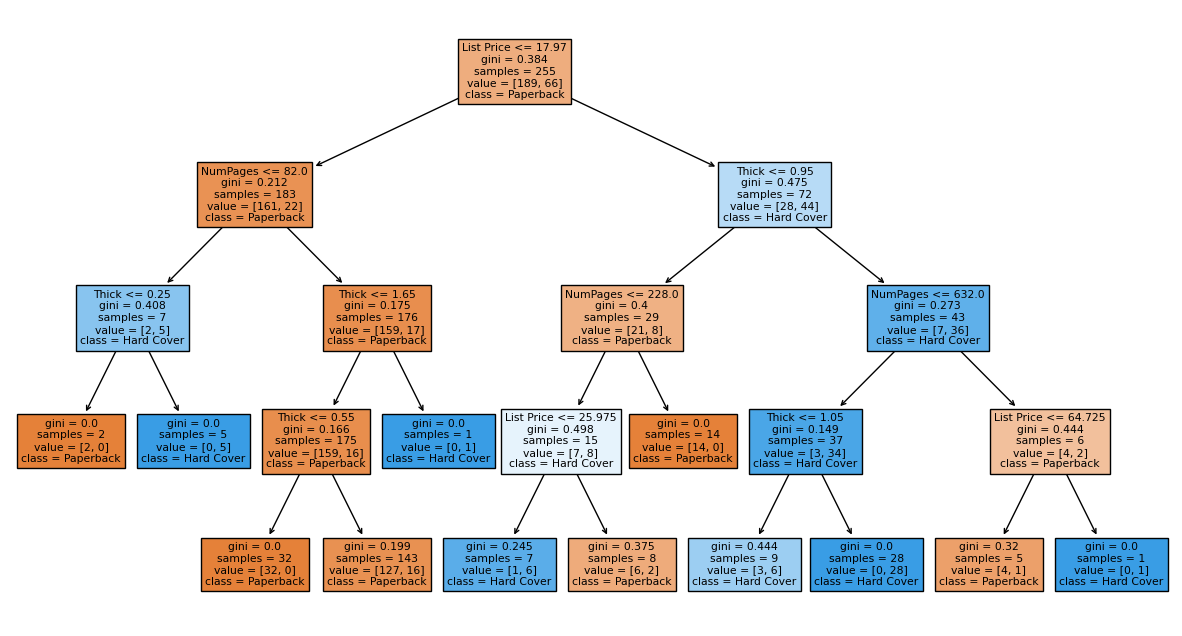

In [7]:
#Q5
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Prepare the data
X = ab_reduced_noNaN_train[['NumPages', 'Thick', 'List Price']]  # Predictors
y = pd.get_dummies(ab_reduced_noNaN_train["Hard_or_Paper"])['H']  # Target variable: 1 = Hard Cover, 0 = Paperback

# Train the decision tree classifier
clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)
clf2.fit(X, y)

# Visualize the decision tree
plt.figure(figsize=(15, 8))
tree.plot_tree(
    clf2,
    feature_names=['NumPages', 'Thick', 'List Price'],
    class_names=['Paperback', 'Hard Cover'],
    filled=True
)
plt.show()

How predictions are made for clf2

1. Node Splitting:

    The decision tree starts at the root node and splits the data based on one of the predictors (NumPages, Thick, or List Price).
    At each node, the decision is based on a threshold for one of the features. For example:
    
    "is list price >= 20?"
    
    "is NumPages >= 300"
    
    
2. Traversal:
    A data point moves down the tree based on whether it satisfies the conditions at each split. For example: 
    
    If List Price < 20, go left.
    
    If List Price >= 20, go right.

3. Leaf Nodes:
    Once the data reaches a leaf node, the prediction is made based on the majority class in that node (e.g., "Hard Cover" or "Paperback").

Differences between clf and clf2

Key Differences Between clf and clf2

	•	Predictors:
	•	clf: Uses only List Price.
	•	clf2: Uses NumPages, Thick, and List Price.
	•	Tree Depth:
	•	clf: Maximum depth is 2.
	•	clf2: Maximum depth is 4.
	•	Complexity:
	•	clf: Simpler, with fewer splits and rules.
	•	clf2: More complex, considering multiple features and deeper splits.
	•	Predictive Power:
	•	clf: Limited by a single feature, potentially less accurate.
	•	clf2: Likely more accurate due to multiple features and deeper decision paths.
	•	Use Case:
	•	clf: Best for quick, interpretable decisions.
	•	clf2: Better for capturing nuanced patterns with more computational resources.

Confusion Matrix for clf (List Price only):

Confusion Matrix for clf2 (Multiple Predictors):

Metrics for clf (List Price only):
{'Sensitivity': 0.7, 'Specificity': 0.909, 'Accuracy': 0.844}

Metrics for clf2 (Multiple Predictors):
{'Sensitivity': 0.75, 'Specificity': 0.909, 'Accuracy': 0.859}


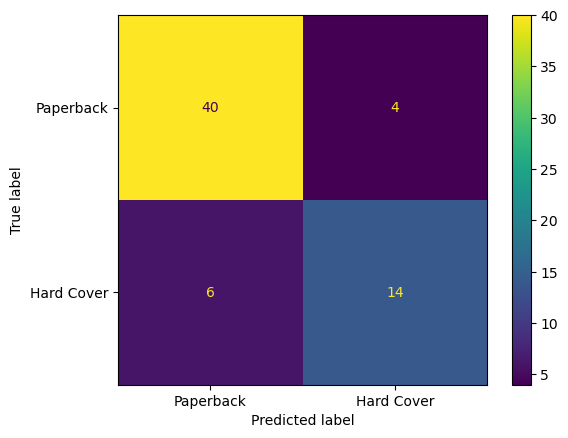

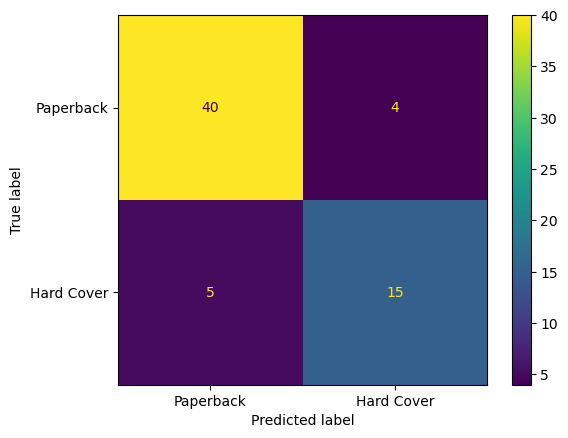

In [10]:
#Q6

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Prepare the test data
X_test_clf2 = ab_reduced_noNaN_test[['NumPages', 'Thick', 'List Price']]
y_test = pd.get_dummies(ab_reduced_noNaN_test["Hard_or_Paper"])['H']  # True labels

# Predict using clf (trained with List Price only)
y_pred_clf = clf.predict(ab_reduced_noNaN_test[['List Price']])

# Predict using basic clf2 (trained with multiple predictors)
y_pred_clf2 = clf2.predict(X_test_clf2)

# Calculate confusion matrices
cm_clf = confusion_matrix(y_test, y_pred_clf)
cm_clf2 = confusion_matrix(y_test, y_pred_clf2)

# Display confusion matrices
print("Confusion Matrix for clf (List Price only):")
ConfusionMatrixDisplay(confusion_matrix=cm_clf, display_labels=["Paperback", "Hard Cover"]).plot()

print("\nConfusion Matrix for clf2 (Multiple Predictors):")
ConfusionMatrixDisplay(confusion_matrix=cm_clf2, display_labels=["Paperback", "Hard Cover"]).plot()

# Define a helper function to compute metrics
def compute_metrics(cm):
    TP = cm[1, 1]
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]

    sensitivity = TP / (TP + FN)  # True Positive Rate
    specificity = TN / (TN + FP)  # True Negative Rate
    accuracy = (TP + TN) / cm.sum()  # Overall accuracy

    return {
        "Sensitivity": round(sensitivity, 3),
        "Specificity": round(specificity, 3),
        "Accuracy": round(accuracy, 3),
    }

# Compute metrics for both models
metrics_clf = compute_metrics(cm_clf)
metrics_clf2 = compute_metrics(cm_clf2)

print("\nMetrics for clf (List Price only):")
print(metrics_clf)

print("\nMetrics for clf2 (Multiple Predictors):")
print(metrics_clf2)

Q7

The differences between the two confusion matrices arise from how the clf model uses its input features. The first confusion matrix reflects predictions made by clf trained only on List Price, while the second matrix incorrectly applies the same model (clf) to a feature set it wasn’t trained on (NumPages, Thick, and List Price). This mismatch causes the model to produce nonsensical predictions because it expects only List Price as input.

The confusion matrices for clf and clf2 (trained correctly with their respective input features) are better because they align the model’s training and prediction processes with the correct input features. This alignment ensures that the models operate within their design, leading to valid and meaningful predictions.

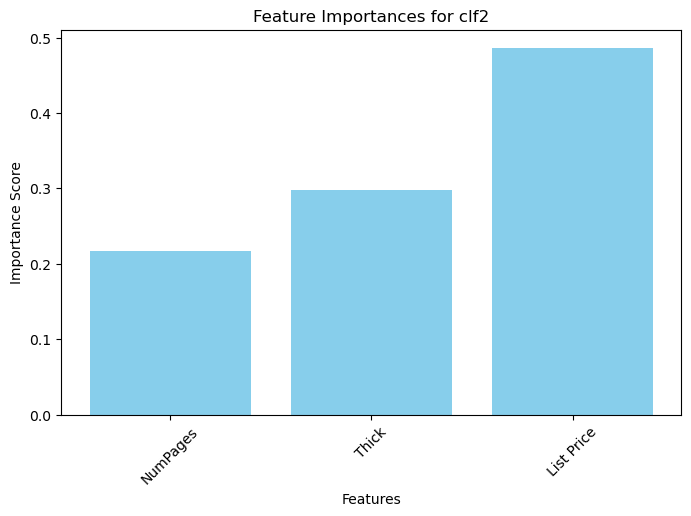

The most important feature for clf2 is 'List Price' with an importance score of 0.486.


In [12]:
#Q8

import matplotlib.pyplot as plt
import numpy as np

# Feature importances for clf2
feature_importances = clf2.feature_importances_
features = clf2.feature_names_in_

# Visualize feature importances
plt.figure(figsize=(8, 5))
plt.bar(features, feature_importances, color='skyblue')
plt.title("Feature Importances for clf2")
plt.ylabel("Importance Score")
plt.xlabel("Features")
plt.xticks(rotation=45)
plt.show()

# Report the most important feature
most_important_feature_index = np.argmax(feature_importances)
most_important_feature = features[most_important_feature_index]

print(f"The most important feature for clf2 is '{most_important_feature}' with an importance score of {feature_importances[most_important_feature_index]:.3f}.")

Q9

In linear regression, the coefficients directly quantify the relationship between each predictor and the target outcome, allowing for a straightforward interpretation: a unit increase in a predictor corresponds to a change in the outcome by the value of the coefficient, holding all else constant. This provides clear and linear insight into how each predictor contributes to the model’s predictions.

In contrast, decision trees do not have coefficients. Instead, they use feature importances, which reflect the overall contribution of each feature to reducing the splitting criterion (e.g., Gini impurity or entropy) across all nodes of the tree. These importances summarize the cumulative impact of a feature on the model but do not indicate the specific direction or magnitude of the feature’s effect on the outcome, making interpretation less intuitive than in linear regression.

Q10

I used ChatGPT and plan on reviewing the course textbook as well.

ChatGPT Summary

Summary of Interactions

We explored how classification decision trees and linear regression differ in addressing problems and making predictions. Decision trees handle categorical outcomes (e.g., spam detection) by sequentially splitting data based on feature values, while linear regression models continuous outcomes using a weighted sum of predictors. Metrics like accuracy, sensitivity, specificity, and precision were discussed with real-world applications, emphasizing how each is suited to specific contexts like medical screening or fraud detection.

For the Amazon Books dataset, preprocessing involved removing irrelevant columns, dropping rows with missing values, and converting data types to prepare for machine learning. The dataset was split into training (80%) and test (20%) subsets, and a decision tree (clf) was trained using List Price as the sole predictor with a maximum depth of 2. We also trained a more complex tree (clf2) using NumPages, Thick, and List Price with a depth of 4, visualized both models, and explained their prediction mechanisms.

Confusion matrices for clf and clf2 were generated to assess performance on the test set, and sensitivity, specificity, and accuracy metrics were computed for both models. Differences in performance highlighted how additional features in clf2 improved predictions. Using feature importances, we identified and visualized the most influential predictors in clf2, revealing List Price as a key feature.

Finally, we compared the interpretability of linear regression coefficients with decision tree feature importances. While coefficients in regression provide direct insight into the effect of predictors, feature importances summarize overall contributions to reducing impurity, offering a broader but less intuitive perspective on feature relevance.

https://chatgpt.com/share/673fcccb-f974-800d-8011-b4e6ce6ac37e